##### greying out the columns for coluzzii 2Rd and 2Rj

In [1]:
import ingenos
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
base = "/afs/crc.nd.edu/group/BesanskyNGS/data05/comp_karyo/data/amplicon_sequencing/"

##### read in the concordance file

In [3]:
conc = pd.read_excel(base + "results/three_way_comparisons_Formulae13Apr20.xlsx", 
                   sheet_name = "three_way_comparisons_041020")

conc.head()

,ID,village,species,a_cyto,a_amp,a_oa,concat,j_cyto,j_amp,j_oa,...,c_gam_oa,concat.4,d_cyto,d_amp,d_oa,concat.5,u_cyto,u_amp,u_oa,concat.6
0,BF0600306,Koakin,M,1.0,1,1,111,0.0,0,0,...,0,000,0.0,0,0,000,0.0,0,0,000
1,BF0600930,Kombissiri,M,2.0,1,1,211,0.0,0,0,...,0,000,0.0,0,0,000,2.0,2,2,222
2,BF0601776,Loussa,M,2.0,1,1,211,0.0,0,0,...,0,000,1.0,0,0,100,0.0,0,0,000
3,BF0605000,Namymi,M,2.0,1,1,211,0.0,0,0,...,0,000,0.0,0,0,000,1.0,1,1,111
4,BF0600708,Siguivousse,M,2.0,2,2,222,0.0,0,0,...,0,000,0.0,0,0,000,0.0,1,1,011


In [4]:
conc.rename(columns = {"concat" : "a_concat",
            "concat.1" : "j_concat",
            "concat.2" : "b_concat",
            "concat.3" : "c_col_concat",
            "concat.4" : "c_gam_concat",
            "concat.5" : "d_concat",
            "concat.6" : "u_concat"}, inplace=True)

conc.drop(columns = ["c_cyto.1"], inplace=True)

conc.columns

Index(['ID', 'village', 'species', 'a_cyto', 'a_amp', 'a_oa', 'a_concat',
       'j_cyto', 'j_amp', 'j_oa', 'j_concat', 'b_cyto', 'b_amp', 'b_oa',
       'b_concat', 'c_cyto', 'c_col_amp', 'c_col_oa', 'c_col_concat',
       'c_gam_amp', 'c_gam_oa', 'c_gam_concat', 'd_cyto', 'd_amp', 'd_oa',
       'd_concat', 'u_cyto', 'u_amp', 'u_oa', 'u_concat'],
      dtype='object')

In [5]:
conc.drop(labels=range(957,979), inplace=True)

In [6]:
trimmed = conc[["ID", "species", "a_concat", "j_concat", "b_concat", "c_col_concat", 
                "c_gam_concat",
                "d_concat", "u_concat"]].sort_values("species")

trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat
0,BF0600306,M,111,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000
353,BF0605525,M,222,000,111,111,100,100,000
352,BF0605129,M,222,000,111,111,100,000,000
351,BF0605552,M,222,000,111,111,101,000,011


##### keep only the appropriate c data

In [7]:
trimmed.loc[trimmed["species"] == "M", "c_concat"] =\
trimmed.loc[trimmed["species"] == "M", "c_col_concat"]

trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
0,BF0600306,M,111,000,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000,111
353,BF0605525,M,222,000,111,111,100,100,000,111
352,BF0605129,M,222,000,111,111,100,000,000,111
351,BF0605552,M,222,000,111,111,101,000,011,111


In [8]:
trimmed.tail()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
658,BF0604092,S,222,000,111,000,000,000,000,NaN
657,BF0604852,S,222,000,111,000,000,000,000,NaN
656,BF0604664,S,222,000,111,100,100,000,000,NaN
667,BF0604636,S,222,000,111,000,000,000,000,NaN
956,BF0602320,S,111,100,222,000,000,000,000,NaN


In [9]:
trimmed.loc[trimmed["species"] == "S", "c_concat"] =\
trimmed.loc[trimmed["species"] == "S", "c_gam_concat"]

trimmed.tail()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
658,BF0604092,S,222,000,111,000,000,000,000,000
657,BF0604852,S,222,000,111,000,000,000,000,000
656,BF0604664,S,222,000,111,100,100,000,000,100
667,BF0604636,S,222,000,111,000,000,000,000,000
956,BF0602320,S,111,100,222,000,000,000,000,000


In [10]:
trimmed.head()

,ID,species,a_concat,j_concat,b_concat,c_col_concat,c_gam_concat,d_concat,u_concat,c_concat
0,BF0600306,M,111,000,000,000,000,000,000,000
354,BF0605576,M,222,000,111,111,100,100,000,111
353,BF0605525,M,222,000,111,111,100,100,000,111
352,BF0605129,M,222,000,111,111,100,000,000,111
351,BF0605552,M,222,000,111,111,101,000,011,111


In [11]:
trimmed = trimmed.drop(columns = ["c_col_concat", "c_gam_concat"]).set_index(["ID", "species"])

trimmed = trimmed[["a_concat", "j_concat", "b_concat", "c_concat", "d_concat", "u_concat"]]

trimmed.head()

,,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
ID,species,,,,,,
BF0600306,M,111,000,000,000,000,000
BF0605576,M,222,000,111,111,100,000
BF0605525,M,222,000,111,111,100,000
BF0605129,M,222,000,111,111,000,000
BF0605552,M,222,000,111,111,000,011


In [12]:
trimmed.apply(pd.Series.value_counts)

,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
000,1.0,947.0,124.0,462.0,863.0,778.0
001,NaN,NaN,NaN,28.0,NaN,1.0
00missing,NaN,4.0,2.0,2.0,4.0,2.0
010,NaN,NaN,NaN,NaN,NaN,2.0
011,NaN,NaN,1.0,8.0,7.0,39.0
01missing,NaN,NaN,NaN,NaN,NaN,1.0
022,NaN,NaN,7.0,NaN,NaN,10.0
0missing0,NaN,5.0,NaN,4.0,5.0,4.0
0missing2,NaN,NaN,NaN,NaN,NaN,1.0
100,NaN,1.0,1.0,44.0,45.0,7.0


##### all agree: green
##### missing: grey
##### all disagree: red

##### cyto and amp agree: purple
##### cyto and OA agree: black
##### OA and amp agree: orange

##### order: cyto, amp, OA

In [13]:
cmap_dict = {key : None for key in trimmed.apply(pd.Series.value_counts).index}

for key in cmap_dict.keys():
    
    if "missing" in key:
        
        cmap_dict[key] = "grey"
        
    elif key == "000" or key == "111" or key == "222":
        
        cmap_dict[key] = "green"
        
    elif key == "102" or key == "201" or key == "201" or key == "210":
        
        cmap_dict[key] = "red"
        
    elif key == "011" or key == "022" or key == "100" or key == "200" or key == "122" \
    or key == "200" or key == "211":
        
        cmap_dict[key] = "orange"
        
    elif key == "001" or key == "110" or key == "112" or key == "220" or key == "221":
        
        cmap_dict[key] = "purple"
        
    elif key == "010" or key == "101" or key == "121" or key == "202":
        
        cmap_dict[key] = "black"
        
    else:
        
        print(key)

In [14]:
translate = {value : i for i, 
             value in enumerate(pd.unique(trimmed.replace(cmap_dict).values.ravel()))}

translate

{'green': 0, 'orange': 1, 'purple': 2, 'grey': 3, 'black': 4, 'red': 5}

In [15]:
trimmed.replace(cmap_dict).replace(translate).head()

,,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
ID,species,,,,,,
BF0600306,M,0,0,0,0,0,0
BF0605576,M,0,0,0,0,1,0
BF0605525,M,0,0,0,0,1,0
BF0605129,M,0,0,0,0,0,0
BF0605552,M,0,0,0,0,0,1


In [16]:
my_colors = [colors.to_rgba(key) for key in translate.keys()]

cmap = ListedColormap(my_colors)

my_colors

[(0.0, 0.5019607843137255, 0.0, 1.0),
 (1.0, 0.6470588235294118, 0.0, 1.0),
 (0.5019607843137255, 0.0, 0.5019607843137255, 1.0),
 (0.5019607843137255, 0.5019607843137255, 0.5019607843137255, 1.0),
 (0.0, 0.0, 0.0, 1.0),
 (1.0, 0.0, 0.0, 1.0)]

In [17]:
adjusted =\
trimmed.replace(cmap_dict).replace(translate).reset_index().drop(
    columns="ID").set_index("species")

adjusted.head()

,a_concat,j_concat,b_concat,c_concat,d_concat,u_concat
species,,,,,,
M,0,0,0,0,0,0
M,0,0,0,0,1,0
M,0,0,0,0,1,0
M,0,0,0,0,0,0
M,0,0,0,0,0,1


##### replace with grey

In [18]:
translate

{'green': 0, 'orange': 1, 'purple': 2, 'grey': 3, 'black': 4, 'red': 5}

##### grey is 3

In [19]:
adjusted.loc["M", "j_concat"] = 3

In [20]:
adjusted.loc["M", "d_concat"] = 3

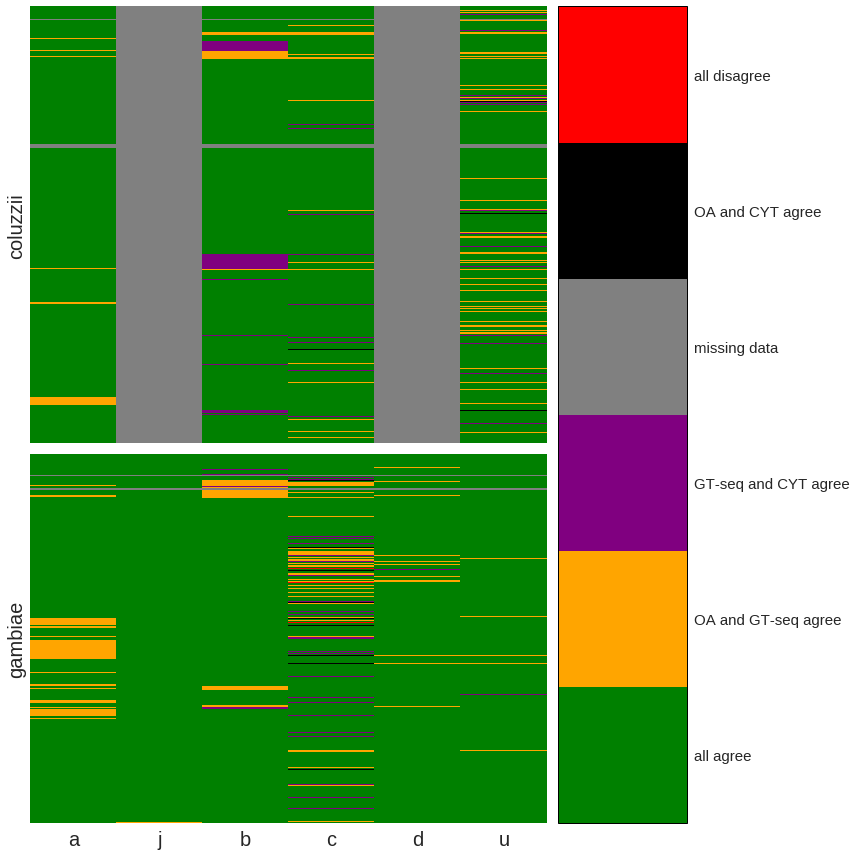

In [21]:
outString = ingenos.make_date_stamp(base + "results/heatmap")

fig = plt.figure(figsize=(12, 12))
gs1 = GridSpec(2, 2, width_ratios = [4,1], height_ratios = [519, 438], hspace=0.05)
ax1 = fig.add_subplot(gs1[0, :1])
ax2 = fig.add_subplot(gs1[1, :1])
axcb = fig.add_subplot(gs1[:, 1])

ax1 = sns.heatmap(data=adjusted.loc["M", :], cmap=cmap, cbar=False, ax=ax1, vmax=5)
ax1.set_yticks([])
ax1.set_ylabel("coluzzii", size=20)
ax1.set_xticks([])

ax2 = sns.heatmap(data=adjusted.loc["S", :], cmap=cmap, cbar_ax=axcb, ax=ax2, vmax=5)
ax2.set_yticks([])
ax2.set_ylabel("gambiae", size=20)
ax2.set_xticklabels(["a", "j", "b", "c", "d", "u"], rotation = 0, size = 20)

colorbar = ax2.collections[0].colorbar
colorbar.set_ticks(np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]) * (5/6))
colorbar.set_ticklabels(["all agree", "OA and GT-seq agree", "GT-seq and CYT agree",
                        "missing data", "OA and CYT agree", "all disagree"])
colorbar.ax.tick_params(labelsize=15)
colorbar.outline.set_edgecolor("black")
colorbar.outline.set_linewidth(1)

gs1.tight_layout(fig)

#plt.savefig(outString);